In [2]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 

In [4]:
#Reading the dataset
df = pd.read_csv("oasis_cross-sectional.csv")

In [5]:
# The first 5 observation units of the data set were accessed.
df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [7]:
# The size of the data set was examined. It consists of 436 observation units and 12 variables.
df.shape

(436, 12)

In [8]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [9]:
# Descriptive statistics of the data set accessed.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Age,436.0,51.357798,25.269862,18.000,20.000,23.00000,54.000,74.00000,83.0000,87.25000,91.6500,96.000
Educ,235.0,3.178723,1.311510,1.000,2.000,2.00000,3.000,4.00000,5.0000,5.00000,5.0000,5.000
SES,216.0,2.490741,1.120593,1.000,1.000,2.00000,2.000,3.00000,4.0000,4.00000,4.8500,5.000
MMSE,235.0,27.063830,3.696870,14.000,21.000,26.00000,29.000,30.00000,30.0000,30.00000,30.0000,30.000
CDR,235.0,0.285106,0.383405,0.000,0.000,0.00000,0.000,0.50000,1.0000,1.00000,1.0000,2.000
eTIV,436.0,1481.919725,158.740866,1123.000,1285.000,1367.75000,1475.500,1579.25000,1708.0000,1751.50000,1878.0500,1992.000
nWBV,436.0,0.791670,0.059937,0.644,0.702,0.74275,0.809,0.84200,0.8575,0.86525,0.8780,0.893
ASF,436.0,1.198894,0.128682,0.881,1.030,1.11175,1.190,1.28425,1.3680,1.43650,1.5175,1.563
Delay,20.0,20.550000,23.862490,1.000,1.900,2.75000,11.000,30.75000,42.4000,65.25000,84.2500,89.000


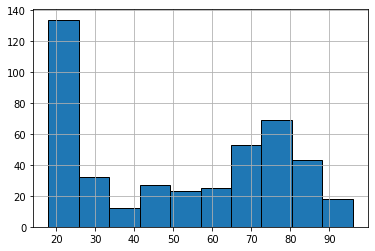

In [10]:
# The histagram of the Age variable was reached.
df["Age"].hist(edgecolor = "black");

In [11]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 96 Min Age: 18


<AxesSubplot:xlabel='ASF', ylabel='Density'>

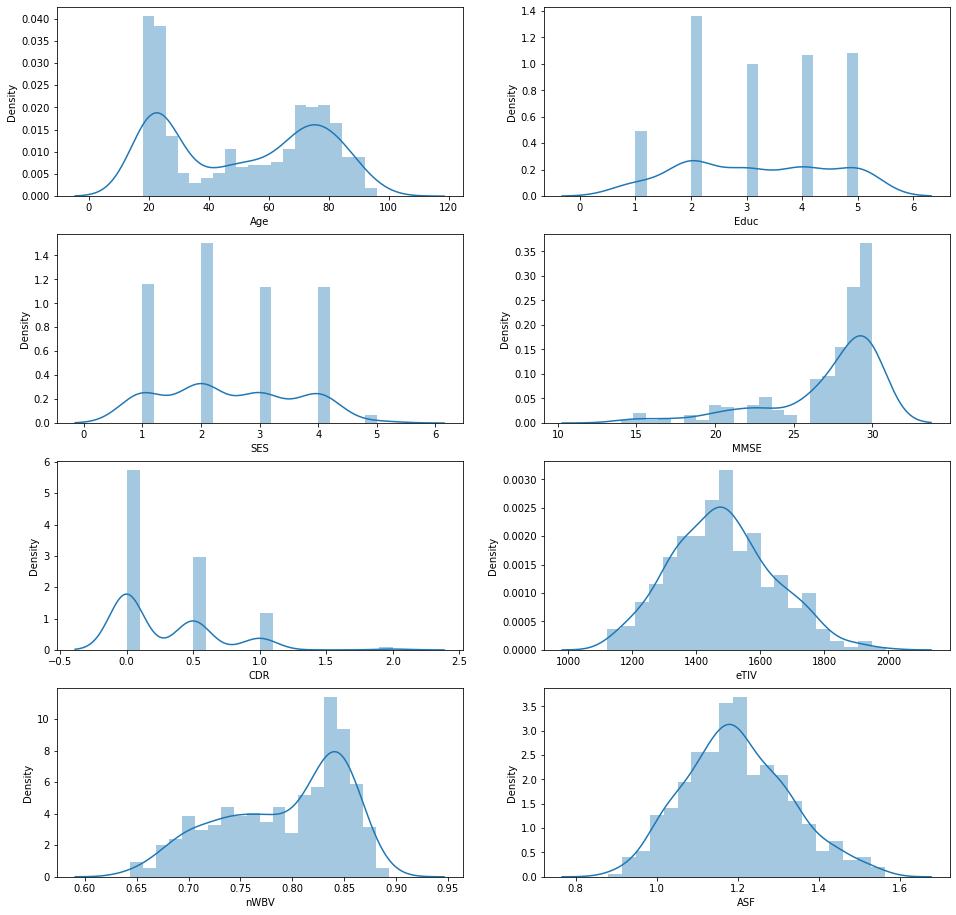

In [16]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Educ, bins = 20, ax=ax[0,1]) 
sns.distplot(df.SES, bins = 20, ax=ax[1,0]) 
sns.distplot(df.MMSE, bins = 20, ax=ax[1,1]) 
sns.distplot(df.CDR, bins = 20, ax=ax[2,0])
sns.distplot(df.eTIV, bins = 20, ax=ax[2,1])
sns.distplot(df.nWBV, bins = 20, ax=ax[3,0]) 
sns.distplot(df.ASF, bins = 20, ax=ax[3,1]) 

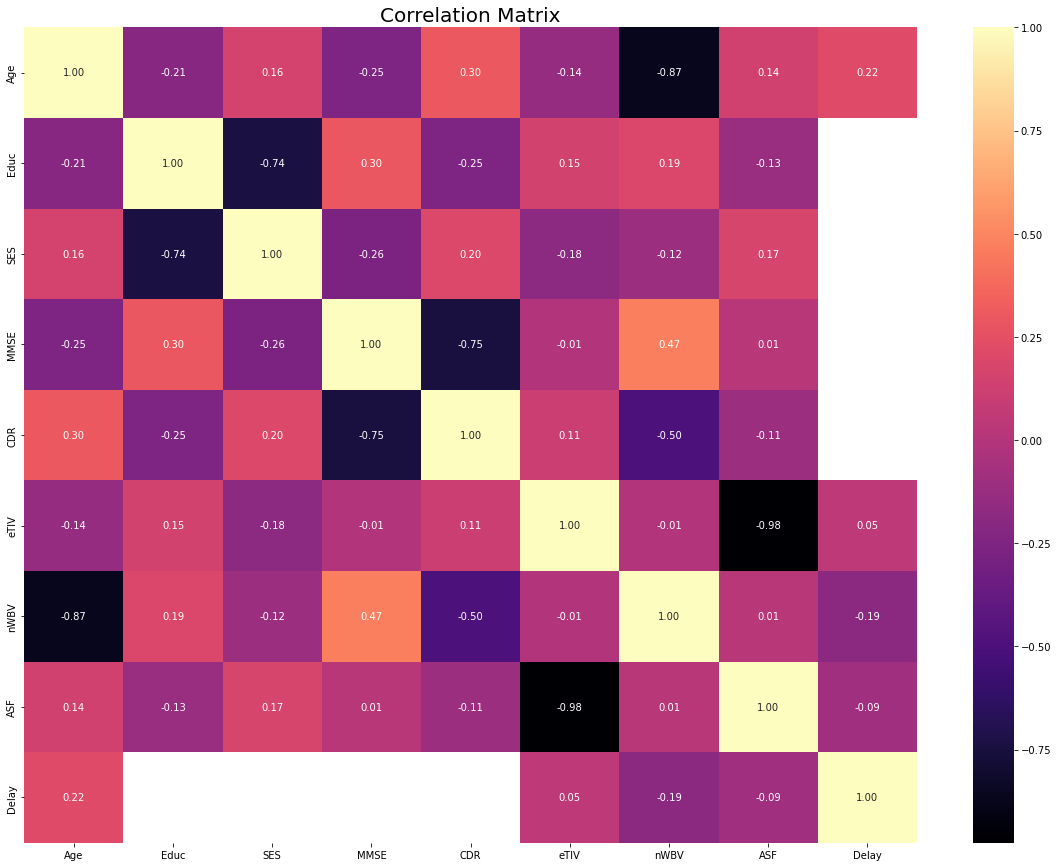

In [17]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [18]:
# Now, we can look at where are missing values
df.isnull().sum()

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

In [20]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Delay']].groupby(['Delay'])[[var]].median().reset_index()
    return temp